# Austin Bikeshare Analysis

Comprehensive analysis of Austin bike share data, exploring usage patterns, bike utilization metrics, popular routes with seasonality trends, and anomaly detection for station activity monitoring across the bike share network.

**Bike Share Station Peak Hour Analysis**

Analysis of peak usage hours across bike share stations, identifying the busiest time of day
for each location. Top station is 21st/Speedway @ PCL with 9,169 trips at 6 PM (8.45% of
station total). Features station rankings, peak hour distribution showing strong evening
commute pattern (17-18:00), scatter analysis of trip concentration, and time period
categorization. Reveals that 17:00-18:00 is the most common peak hour across stations,
with clear morning (7-9) and evening (17-19) commute patterns dominating usage.

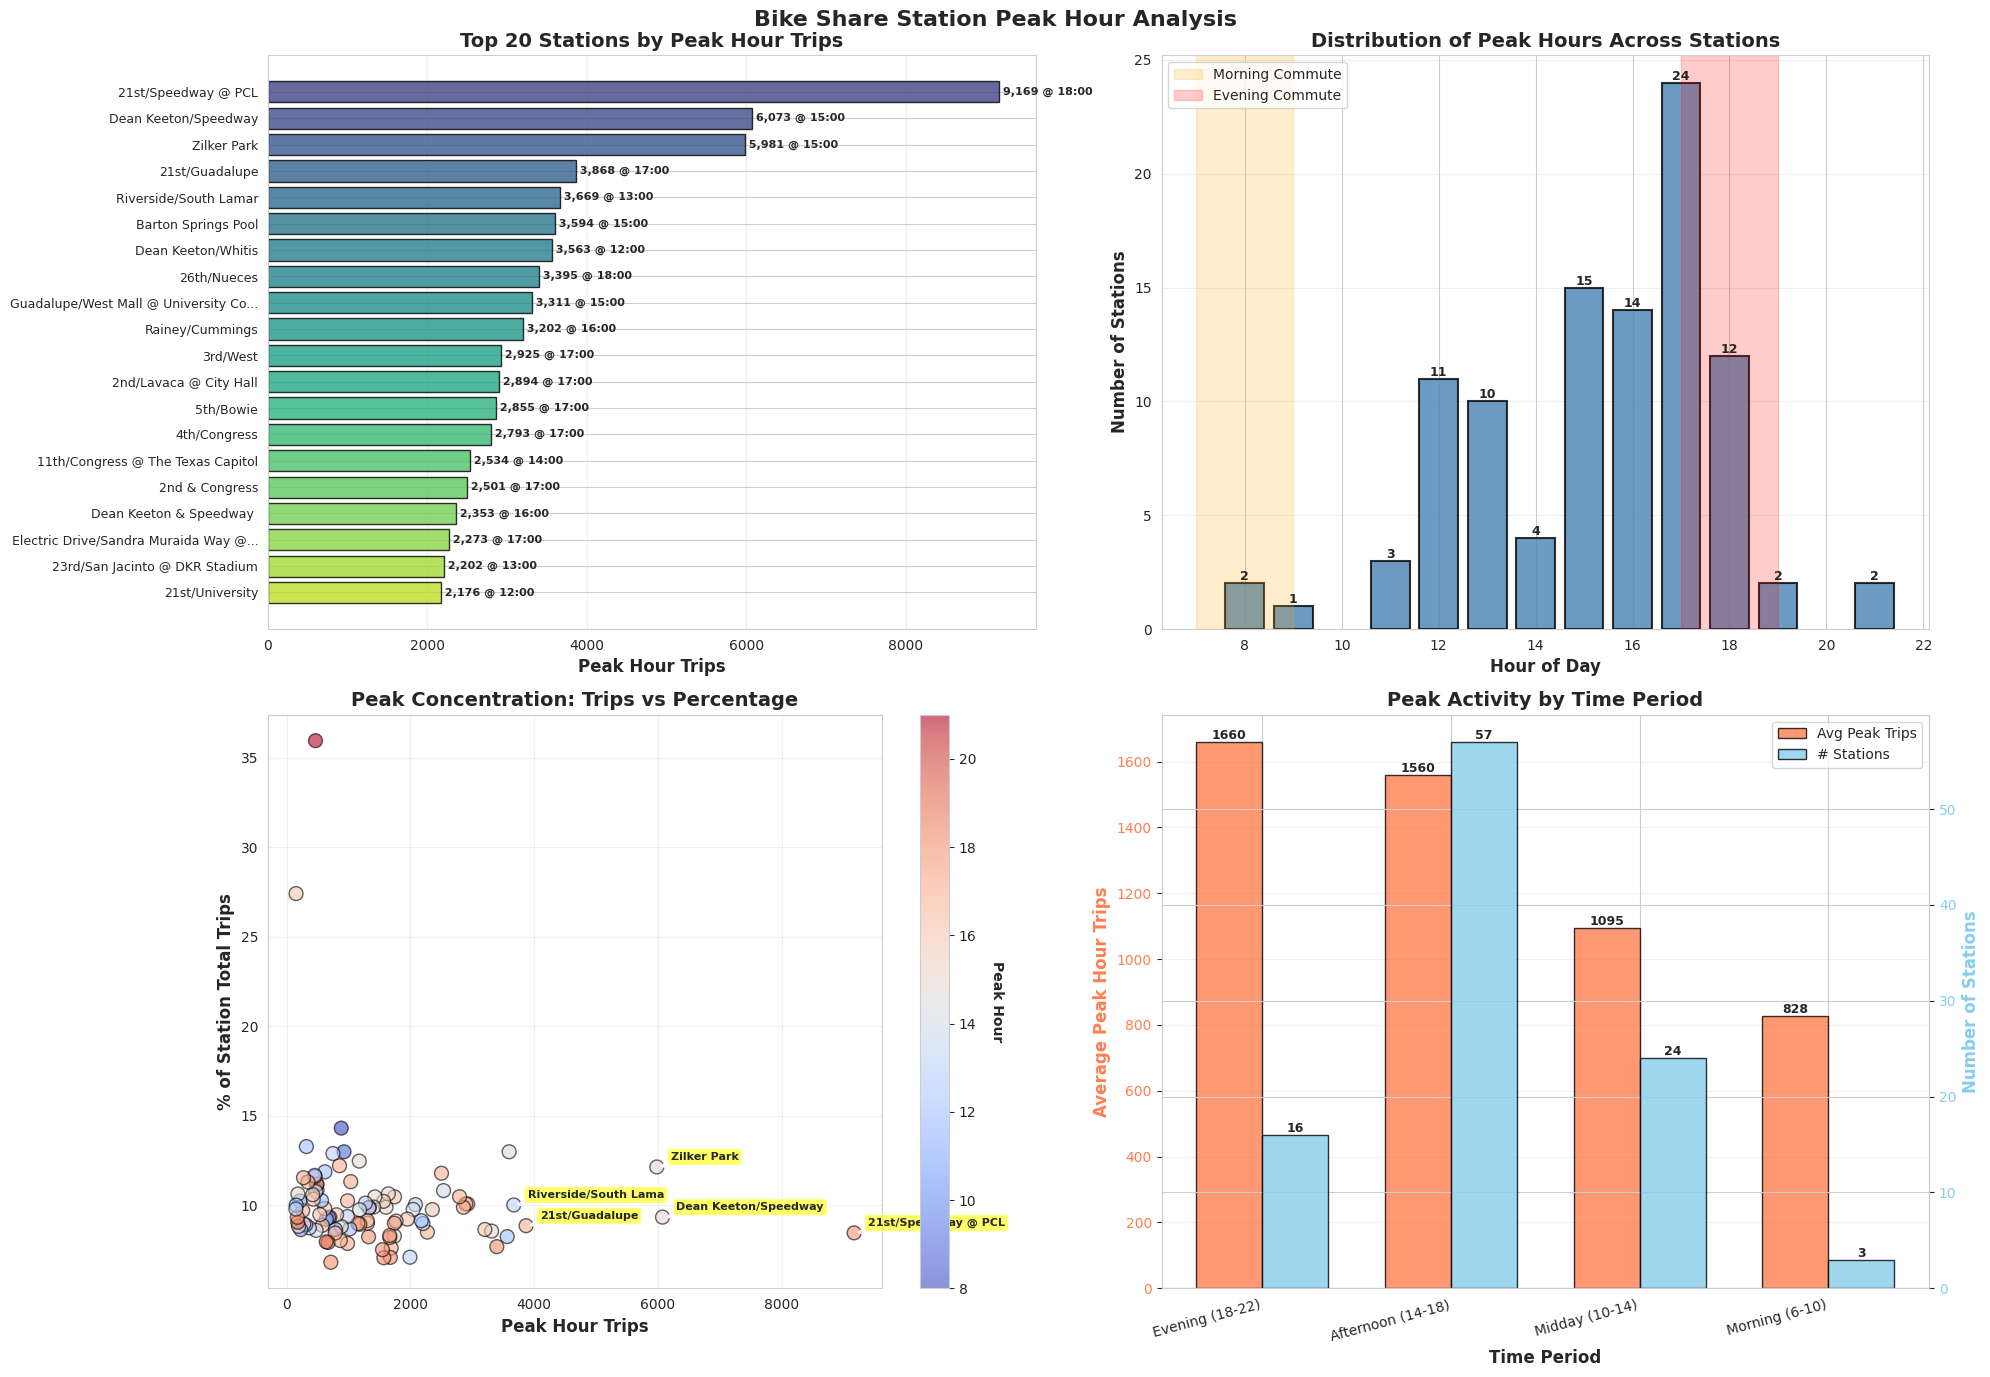


BIKE SHARE STATION PEAK HOUR ANALYSIS
Total Stations Analyzed: 100
Average Peak Hour Trips: 1,442
Median Peak Hour Trips: 1,027
Average % of Station Trips: 10.13%

Top 5 Busiest Stations:
------------------------------------------------------------------------------------------
#1. 21st/Speedway @ PCL
    Peak Hour: 18:00 | Trips: 9,169 | % of Total: 8.45%
#2. Dean Keeton/Speedway
    Peak Hour: 15:00 | Trips: 6,073 | % of Total: 9.33%
#3. Zilker Park
    Peak Hour: 15:00 | Trips: 5,981 | % of Total: 12.13%
#4. 21st/Guadalupe
    Peak Hour: 17:00 | Trips: 3,868 | % of Total: 8.85%
#5. Riverside/South Lamar
    Peak Hour: 13:00 | Trips: 3,669 | % of Total: 10.01%

PEAK HOUR DISTRIBUTION
Hour       # Stations      % of Stations  
------------------------------------------------------------------------------------------
08:00      2               2.00           %
09:00      1               1.00           %
11:00      3               3.00           %
12:00      11              11.00      

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('00_peak_hour_per_station.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Bike Share Station Peak Hour Analysis', fontsize=16, fontweight='bold')

# Plot 1: Top 20 Stations by Peak Hour Trips
ax1 = axes[0, 0]
top_20 = df.head(20)
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_20)))
bars = ax1.barh(range(len(top_20)), top_20['peak_hour_trips'],
                color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels([name[:35] + '...' if len(name) > 35 else name
                      for name in top_20['start_station_name']], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Peak Hour Trips', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Stations by Peak Hour Trips', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (name, trips, hour) in enumerate(zip(top_20['start_station_name'],
                                              top_20['peak_hour_trips'],
                                              top_20['peak_hour'])):
    ax1.text(trips, i, f' {trips:,} @ {hour}:00',
             va='center', fontsize=8, fontweight='bold')

# Plot 2: Peak Hour Distribution
ax2 = axes[0, 1]
peak_hour_dist = df.groupby('peak_hour')['start_station_id'].count().sort_index()

bars2 = ax2.bar(peak_hour_dist.index, peak_hour_dist.values,
                color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Stations', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Peak Hours Across Stations', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24, 2))
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (hour, count) in enumerate(zip(peak_hour_dist.index, peak_hour_dist.values)):
    ax2.text(hour, count, str(count), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Highlight commute hours
ax2.axvspan(7, 9, alpha=0.2, color='orange', label='Morning Commute')
ax2.axvspan(17, 19, alpha=0.2, color='red', label='Evening Commute')
ax2.legend(loc='upper left', fontsize=10)

# Plot 3: Scatter - Peak Hour Trips vs % of Station Trips
ax3 = axes[1, 0]
scatter = ax3.scatter(df['peak_hour_trips'], df['pct_of_station_trips_pct'],
                     c=df['peak_hour'], cmap='coolwarm', s=100,
                     alpha=0.6, edgecolors='black', linewidth=1)

ax3.set_xlabel('Peak Hour Trips', fontsize=12, fontweight='bold')
ax3.set_ylabel('% of Station Total Trips', fontsize=12, fontweight='bold')
ax3.set_title('Peak Concentration: Trips vs Percentage', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Peak Hour', rotation=270, labelpad=20, fontweight='bold')

# Annotate top stations
for i in range(min(5, len(df))):
    ax3.annotate(df.iloc[i]['start_station_name'][:20],
                xy=(df.iloc[i]['peak_hour_trips'], df.iloc[i]['pct_of_station_trips_pct']),
                xytext=(10, 5), textcoords='offset points',
                fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Plot 4: Average Peak Hour by Station Type/Location
ax4 = axes[1, 1]

# Categorize stations by peak hour period
def categorize_peak(hour):
    if 6 <= hour < 10:
        return 'Morning (6-10)'
    elif 10 <= hour < 14:
        return 'Midday (10-14)'
    elif 14 <= hour < 18:
        return 'Afternoon (14-18)'
    elif 18 <= hour < 22:
        return 'Evening (18-22)'
    else:
        return 'Night (22-6)'

df['peak_period'] = df['peak_hour'].apply(categorize_peak)
period_stats = df.groupby('peak_period').agg({
    'peak_hour_trips': 'mean',
    'start_station_id': 'count'
}).reset_index()
period_stats.columns = ['period', 'avg_trips', 'station_count']
period_stats = period_stats.sort_values('avg_trips', ascending=False)

# Create grouped bar chart
x_pos = np.arange(len(period_stats))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, period_stats['avg_trips'], width,
                label='Avg Peak Trips', color='coral', alpha=0.8, edgecolor='black')
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x_pos + width/2, period_stats['station_count'], width,
                     label='# Stations', color='skyblue', alpha=0.8, edgecolor='black')

ax4.set_xlabel('Time Period', fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Peak Hour Trips', fontsize=12, fontweight='bold', color='coral')
ax4_twin.set_ylabel('Number of Stations', fontsize=12, fontweight='bold', color='skyblue')
ax4.set_title('Peak Activity by Time Period', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(period_stats['period'], rotation=15, ha='right')
ax4.tick_params(axis='y', labelcolor='coral')
ax4_twin.tick_params(axis='y', labelcolor='skyblue')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (trips, count) in enumerate(zip(period_stats['avg_trips'], period_stats['station_count'])):
    ax4.text(i - width/2, trips, f'{trips:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax4_twin.text(i + width/2, count, f'{count}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*90)
print("BIKE SHARE STATION PEAK HOUR ANALYSIS")
print("="*90)
print(f"Total Stations Analyzed: {len(df)}")
print(f"Average Peak Hour Trips: {df['peak_hour_trips'].mean():,.0f}")
print(f"Median Peak Hour Trips: {df['peak_hour_trips'].median():,.0f}")
print(f"Average % of Station Trips: {df['pct_of_station_trips_pct'].mean():.2f}%")

print(f"\nTop 5 Busiest Stations:")
print("-"*90)
for i in range(min(5, len(df))):
    station = df.iloc[i]
    print(f"#{i+1}. {station['start_station_name']}")
    print(f"    Peak Hour: {station['peak_hour']}:00 | Trips: {station['peak_hour_trips']:,} | "
          f"% of Total: {station['pct_of_station_trips_pct']:.2f}%")

print("\n" + "="*90)
print("PEAK HOUR DISTRIBUTION")
print("="*90)
peak_dist = df.groupby('peak_hour').size().sort_index()
print(f"{'Hour':<10} {'# Stations':<15} {'% of Stations':<15}")
print("-"*90)
for hour, count in peak_dist.items():
    pct = (count / len(df)) * 100
    print(f"{hour:02d}:00{'':<5} {count:<15} {pct:<15.2f}%")

print("\n" + "="*90)
print("COMMUTE PATTERN ANALYSIS")
print("="*90)
morning_commute = df[(df['peak_hour'] >= 7) & (df['peak_hour'] <= 9)]
evening_commute = df[(df['peak_hour'] >= 17) & (df['peak_hour'] <= 19)]
midday = df[(df['peak_hour'] >= 11) & (df['peak_hour'] <= 15)]

print(f"Morning Commute (7-9 AM):")
print(f"  Stations: {len(morning_commute)} ({(len(morning_commute)/len(df)*100):.1f}%)")
print(f"  Avg Peak Trips: {morning_commute['peak_hour_trips'].mean():,.0f}")

print(f"\nEvening Commute (5-7 PM):")
print(f"  Stations: {len(evening_commute)} ({(len(evening_commute)/len(df)*100):.1f}%)")
print(f"  Avg Peak Trips: {evening_commute['peak_hour_trips'].mean():,.0f}")

print(f"\nMidday (11 AM-3 PM):")
print(f"  Stations: {len(midday)} ({(len(midday)/len(df)*100):.1f}%)")
print(f"  Avg Peak Trips: {midday['peak_hour_trips'].mean():,.0f}")

print("\n" + "="*90)
print("HIGH CONCENTRATION STATIONS (>15% of trips in peak hour)")
print("="*90)
high_concentration = df[df['pct_of_station_trips_pct'] > 15]
if len(high_concentration) > 0:
    for _, station in high_concentration.iterrows():
        print(f"{station['start_station_name']}: {station['pct_of_station_trips_pct']:.2f}% @ {station['peak_hour']}:00")
else:
    print("No stations with >15% concentration found")

print("="*90)

**BIKE SHARE SUBSCRIBER TYPE TRIP DURATION ANALYSIS**

This visualization analyzes trip duration patterns across different bike-share subscriber types.
It reveals how different membership levels and pass types influence user behavior, showing
which subscriber types have longer/shorter rides and how usage volume correlates with trip duration.
Key insights reveal whether casual riders (day passes) differ significantly from annual members,
and how special event passes or discounted memberships affect ride behavior.

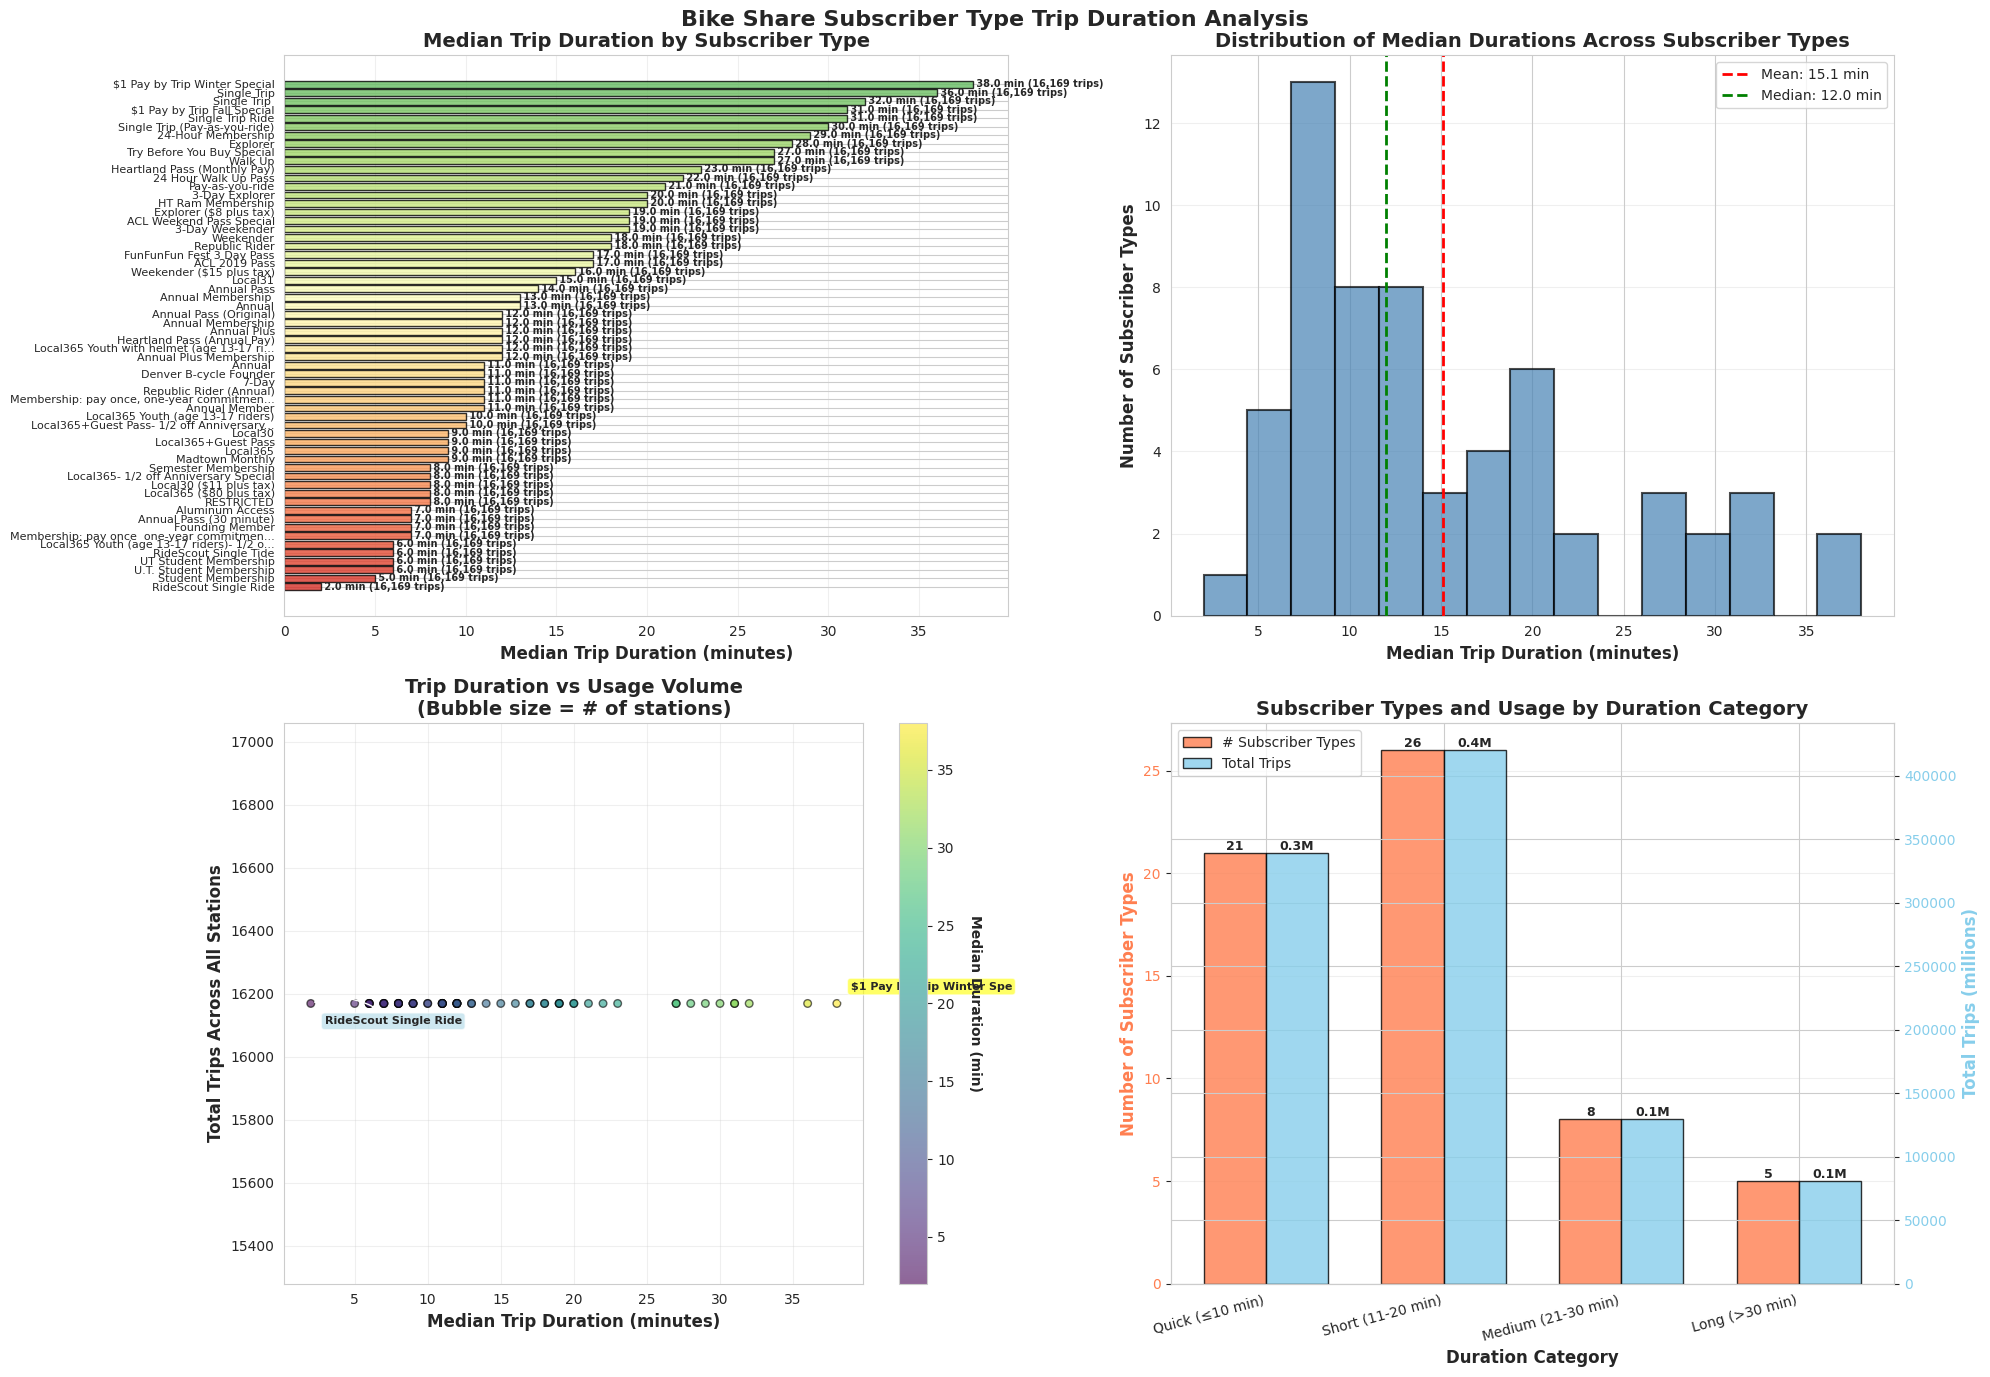


BIKE SHARE SUBSCRIBER TYPE TRIP DURATION ANALYSIS
Total Subscriber Types: 60
Average Median Duration: 15.10 minutes
Median of Medians: 12.00 minutes
Duration Range: 2.0 - 38.0 minutes

Top 10 Longest Trip Duration Subscriber Types:
----------------------------------------------------------------------------------------------------
#1. $1 Pay by Trip Winter Special
    Duration: 38.0 min | Trips: 16,169 | Stations: 10
#2. Single Trip
    Duration: 36.0 min | Trips: 16,169 | Stations: 10
#3. Single Trip 
    Duration: 32.0 min | Trips: 16,169 | Stations: 10
#4. $1 Pay by Trip Fall Special
    Duration: 31.0 min | Trips: 16,169 | Stations: 10
#5. Single Trip Ride
    Duration: 31.0 min | Trips: 16,169 | Stations: 10
#6. Single Trip (Pay-as-you-ride)
    Duration: 30.0 min | Trips: 16,169 | Stations: 10
#7. 24-Hour Membership
    Duration: 29.0 min | Trips: 16,169 | Stations: 10
#8. Explorer
    Duration: 28.0 min | Trips: 16,169 | Stations: 10
#9. Try Before You Buy Special
    Duration:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('01_median_trip_duration_per_subscriber_type.csv')

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Bike Share Subscriber Type Trip Duration Analysis', fontsize=16, fontweight='bold')

# Aggregate data by subscriber type
subscriber_stats = df.groupby('subscriber_type').agg({
    'median_duration_minutes': 'first',  # All values are the same per subscriber type
    'trips_at_station': 'sum',
    'start_station_id': 'count'
}).reset_index()
subscriber_stats.columns = ['subscriber_type', 'median_duration', 'total_trips', 'stations']
subscriber_stats = subscriber_stats.sort_values('median_duration', ascending=False)

# Plot 1: Subscriber Types by Median Duration (Horizontal Bar Chart)
ax1 = axes[0, 0]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(subscriber_stats)))
bars = ax1.barh(range(len(subscriber_stats)), subscriber_stats['median_duration'],
                 color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_yticks(range(len(subscriber_stats)))
ax1.set_yticklabels([name[:40] + '...' if len(name) > 40 else name
                      for name in subscriber_stats['subscriber_type']], fontsize=8)
ax1.invert_yaxis()
ax1.set_xlabel('Median Trip Duration (minutes)', fontsize=12, fontweight='bold')
ax1.set_title('Median Trip Duration by Subscriber Type', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (name, duration, trips) in enumerate(zip(subscriber_stats['subscriber_type'],
                                                  subscriber_stats['median_duration'],
                                                  subscriber_stats['total_trips'])):
    ax1.text(duration, i, f' {duration:.1f} min ({trips:,} trips)',
             va='center', fontsize=7, fontweight='bold')

# Plot 2: Duration Distribution (Histogram with KDE)
ax2 = axes[0, 1]
all_durations = subscriber_stats['median_duration'].values
ax2.hist(all_durations, bins=15, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.axvline(all_durations.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {all_durations.mean():.1f} min')
ax2.axvline(np.median(all_durations), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(all_durations):.1f} min')
ax2.set_xlabel('Median Trip Duration (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Subscriber Types', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Median Durations Across Subscriber Types', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Duration vs Total Trips (Scatter)
ax3 = axes[1, 0]
scatter = ax3.scatter(subscriber_stats['median_duration'],
                     subscriber_stats['total_trips'],
                     s=subscriber_stats['stations']*3,
                     c=subscriber_stats['median_duration'],
                     cmap='viridis', alpha=0.6, edgecolors='black', linewidth=1)

ax3.set_xlabel('Median Trip Duration (minutes)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Total Trips Across All Stations', fontsize=12, fontweight='bold')
ax3.set_title('Trip Duration vs Usage Volume\n(Bubble size = # of stations)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Median Duration (min)', rotation=270, labelpad=20, fontweight='bold')

# Annotate top and bottom outliers
top_idx = subscriber_stats['median_duration'].idxmax()
bottom_idx = subscriber_stats['median_duration'].idxmin()

ax3.annotate(subscriber_stats.loc[top_idx, 'subscriber_type'][:25],
            xy=(subscriber_stats.loc[top_idx, 'median_duration'],
                subscriber_stats.loc[top_idx, 'total_trips']),
            xytext=(10, 10), textcoords='offset points',
            fontsize=8, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))

ax3.annotate(subscriber_stats.loc[bottom_idx, 'subscriber_type'][:25],
            xy=(subscriber_stats.loc[bottom_idx, 'median_duration'],
                subscriber_stats.loc[bottom_idx, 'total_trips']),
            xytext=(10, -15), textcoords='offset points',
            fontsize=8, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.6),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))

# Plot 4: Categorized Durations
ax4 = axes[1, 1]

# Categorize durations
def categorize_duration(duration):
    if duration <= 10:
        return 'Quick (≤10 min)'
    elif duration <= 20:
        return 'Short (11-20 min)'
    elif duration <= 30:
        return 'Medium (21-30 min)'
    else:
        return 'Long (>30 min)'

subscriber_stats['duration_category'] = subscriber_stats['median_duration'].apply(categorize_duration)
category_stats = subscriber_stats.groupby('duration_category').agg({
    'subscriber_type': 'count',
    'total_trips': 'sum',
    'median_duration': 'mean'
}).reset_index()
category_stats.columns = ['category', 'num_types', 'total_trips', 'avg_duration']
category_order = ['Quick (≤10 min)', 'Short (11-20 min)', 'Medium (21-30 min)', 'Long (>30 min)']
category_stats['category'] = pd.Categorical(category_stats['category'], categories=category_order, ordered=True)
category_stats = category_stats.sort_values('category')

# Create grouped bar chart
x_pos = np.arange(len(category_stats))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, category_stats['num_types'], width,
                label='# Subscriber Types', color='coral', alpha=0.8, edgecolor='black', linewidth=1)
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x_pos + width/2, category_stats['total_trips'], width,
                     label='Total Trips', color='skyblue', alpha=0.8, edgecolor='black', linewidth=1)

ax4.set_xlabel('Duration Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Subscriber Types', fontsize=12, fontweight='bold', color='coral')
ax4_twin.set_ylabel('Total Trips (millions)', fontsize=12, fontweight='bold', color='skyblue')
ax4.set_title('Subscriber Types and Usage by Duration Category', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(category_stats['category'], rotation=15, ha='right')
ax4.tick_params(axis='y', labelcolor='coral')
ax4_twin.tick_params(axis='y', labelcolor='skyblue')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (types, trips) in enumerate(zip(category_stats['num_types'], category_stats['total_trips'])):
    ax4.text(i - width/2, types, f'{types}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax4_twin.text(i + width/2, trips, f'{trips/1e6:.1f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*100)
print("BIKE SHARE SUBSCRIBER TYPE TRIP DURATION ANALYSIS")
print("="*100)
print(f"Total Subscriber Types: {len(subscriber_stats)}")
print(f"Average Median Duration: {subscriber_stats['median_duration'].mean():.2f} minutes")
print(f"Median of Medians: {subscriber_stats['median_duration'].median():.2f} minutes")
print(f"Duration Range: {subscriber_stats['median_duration'].min():.1f} - {subscriber_stats['median_duration'].max():.1f} minutes")

print(f"\nTop 10 Longest Trip Duration Subscriber Types:")
print("-"*100)
for i, (idx, row) in enumerate(subscriber_stats.head(10).iterrows()):
    print(f"#{i+1}. {row['subscriber_type']}")
    print(f"    Duration: {row['median_duration']:.1f} min | Trips: {row['total_trips']:,} | Stations: {row['stations']}")

print(f"\nTop 10 Shortest Trip Duration Subscriber Types:")
print("-"*100)
for i, (idx, row) in enumerate(subscriber_stats.tail(10).iterrows()):
    print(f"#{i+1}. {row['subscriber_type']}")
    print(f"    Duration: {row['median_duration']:.1f} min | Trips: {row['total_trips']:,} | Stations: {row['stations']}")

print("\n" + "="*100)
print("DURATION CATEGORY BREAKDOWN")
print("="*100)
print(f"{'Category':<20} {'# Types':<12} {'Total Trips':<15} {'Avg Duration':<15}")
print("-"*100)
for _, row in category_stats.iterrows():
    print(f"{row['category']:<20} {row['num_types']:<12} {row['total_trips']:<15,} {row['avg_duration']:<15.2f}")

print("\n" + "="*100)
print("SUBSCRIBER TYPE INSIGHTS")
print("="*100)

# Membership vs Non-membership
membership_types = subscriber_stats[subscriber_stats['subscriber_type'].str.contains('Member|membership', case=False, na=False)]
non_membership = subscriber_stats[~subscriber_stats['subscriber_type'].str.contains('Member|membership', case=False, na=False)]

print(f"Membership Types: {len(membership_types)}")
print(f"  Average Duration: {membership_types['median_duration'].mean():.2f} minutes")
print(f"  Total Trips: {membership_types['total_trips'].sum():,}")

print(f"\nNon-Membership Types: {len(non_membership)}")
print(f"  Average Duration: {non_membership['median_duration'].mean():.2f} minutes")
print(f"  Total Trips: {non_membership['total_trips'].sum():,}")

# Annual vs Short-term
annual_types = subscriber_stats[subscriber_stats['subscriber_type'].str.contains('Annual|Membership|Member', case=False, na=False)]
shortterm_types = subscriber_stats[subscriber_stats['subscriber_type'].str.contains('Day|Pass|Trip|Ride|Explorer|Weekender', case=False, na=False)]

print(f"\nAnnual/Long-term Types: {len(annual_types)}")
print(f"  Average Duration: {annual_types['median_duration'].mean():.2f} minutes")

print(f"\nShort-term/Pass Types: {len(shortterm_types)}")
print(f"  Average Duration: {shortterm_types['median_duration'].mean():.2f} minutes")

print("="*100)

**Bike Utilization Analysis - Last Month Performance**

This visualization analyzes the operational efficiency of 50 bikes over a one-month period, focusing on three key metrics: active days, average rides per active day, and longest idle period.
The analysis reveals utilization patterns through four comprehensive views:

Efficiency ranking showing top-performing bikes based on total productivity
Activity distribution displaying how consistently bikes were used throughout the month
Utilization patterns examining the relationship between activity frequency and ride intensity
Idle time impact analyzing how downtime affects overall performance

The color coding (green/orange/red) indicates idle period health status, helping identify bikes that may need maintenance attention or repositioning to improve fleet efficiency.

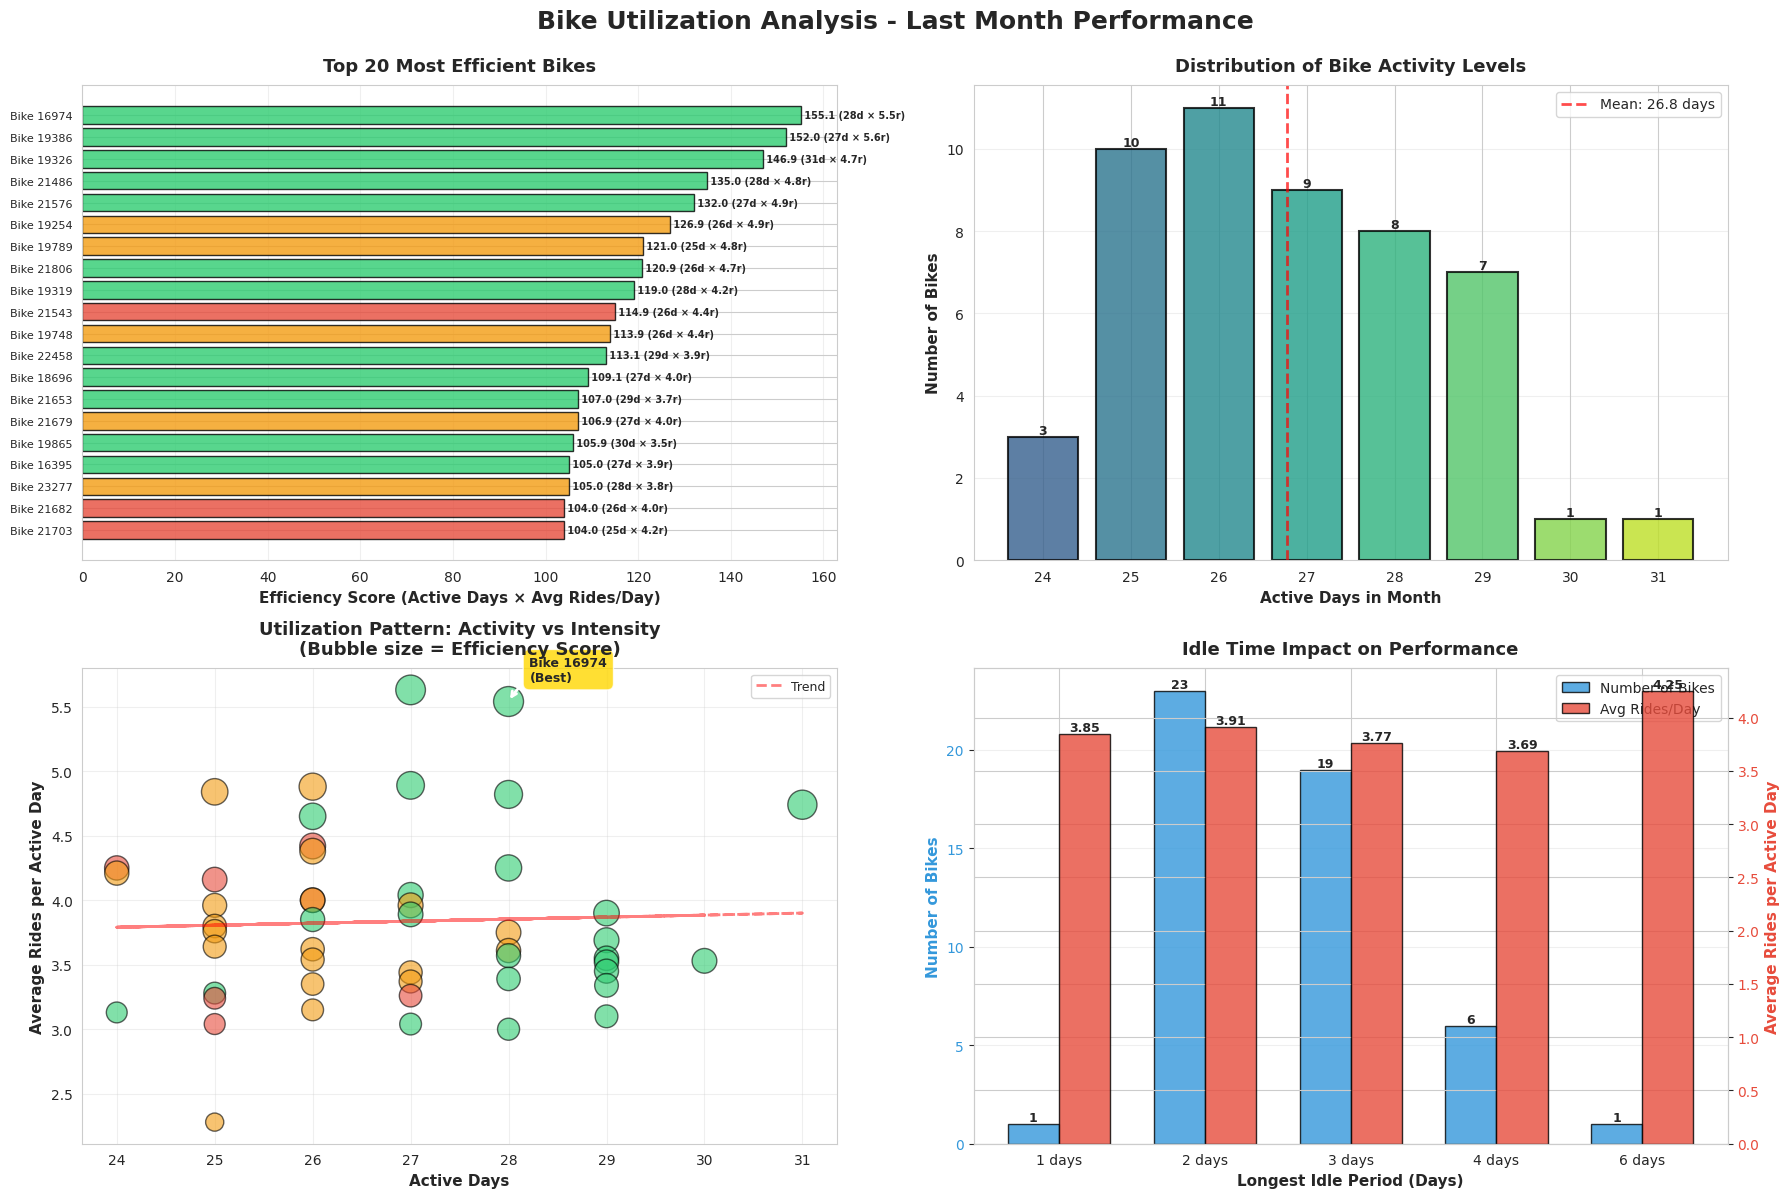


BIKE UTILIZATION ANALYSIS - LAST MONTH PERFORMANCE SUMMARY
Total Bikes Analyzed: 50
Average Active Days: 26.78 days (out of ~31 days)
Average Rides per Active Day: 3.83 rides
Average Efficiency Score: 102.72
Average Longest Idle Period: 2.68 days

ACTIVITY RANGE ANALYSIS
----------------------------------------------------------------------------------------------------
Most Active Bike: 31 days (Bike 19326)
Least Active Bike: 24 days (Bike 19870)
Activity Range: 7 days difference

TOP 10 MOST EFFICIENT BIKES
----------------------------------------------------------------------------------------------------
Rank   Bike ID    Active Days   Avg Rides/Day    Idle Days    Efficiency  
----------------------------------------------------------------------------------------------------
#1     16974.0    28.0          5.54             2.0          155.12      
#2     19386.0    27.0          5.63             2.0          152.01      
#3     19326.0    31.0          4.74             2.0     

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('02_bike_utilization_for_the_last_month.csv')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Bike Utilization Analysis - Last Month Performance', fontsize=18, fontweight='bold', y=0.995)

# Calculate efficiency score (active_days * avg_rides_per_active_day)
df['efficiency_score'] = df['active_days'] * df['avg_rides_per_active_day']
df = df.sort_values('efficiency_score', ascending=False)

# Define color mapping for idle days
def get_idle_color(idle_days):
    if idle_days <= 2:
        return '#2ecc71'  # Green - Good
    elif idle_days <= 3:
        return '#f39c12'  # Orange - Warning
    else:
        return '#e74c3c'  # Red - Alert

# Plot 1: Top 20 Most Efficient Bikes
ax1 = axes[0, 0]
top_20 = df.head(20)
colors = [get_idle_color(idle) for idle in top_20['longest_idle_days']]
bars = ax1.barh(range(len(top_20)), top_20['efficiency_score'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels([f'Bike {bike_id}' for bike_id in top_20['bike_id']], fontsize=8)
ax1.invert_yaxis()
ax1.set_xlabel('Efficiency Score (Active Days × Avg Rides/Day)', fontsize=11, fontweight='bold')
ax1.set_title('Top 20 Most Efficient Bikes', fontsize=13, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (score, rides, days) in enumerate(zip(top_20['efficiency_score'],
                                               top_20['avg_rides_per_active_day'],
                                               top_20['active_days'])):
    ax1.text(score, i, f' {score:.1f} ({days}d × {rides:.1f}r)',
             va='center', fontsize=7, fontweight='bold')

# Plot 2: Active Days Distribution
ax2 = axes[0, 1]
active_days_counts = df['active_days'].value_counts().sort_index()
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(active_days_counts)))
bars2 = ax2.bar(active_days_counts.index, active_days_counts.values,
                color=colors_gradient, alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Active Days in Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Bikes', fontsize=11, fontweight='bold')
ax2.set_title('Distribution of Bike Activity Levels', fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean line
mean_active = df['active_days'].mean()
ax2.axvline(mean_active, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_active:.1f} days', alpha=0.7)
ax2.legend(fontsize=10)

# Plot 3: Rides per Day vs Active Days (Scatter)
ax3 = axes[1, 0]
idle_colors = df['longest_idle_days'].map(get_idle_color)
scatter = ax3.scatter(df['active_days'], df['avg_rides_per_active_day'],
                     s=df['efficiency_score']*3, c=idle_colors,
                     alpha=0.6, edgecolors='black', linewidth=1)

ax3.set_xlabel('Active Days', fontsize=11, fontweight='bold')
ax3.set_ylabel('Average Rides per Active Day', fontsize=11, fontweight='bold')
ax3.set_title('Utilization Pattern: Activity vs Intensity\n(Bubble size = Efficiency Score)',
              fontsize=13, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['active_days'], df['avg_rides_per_active_day'], 1)
p = np.poly1d(z)
ax3.plot(df['active_days'], p(df['active_days']), "r--", alpha=0.5, linewidth=2, label='Trend')
ax3.legend(fontsize=9)

# Annotate top performer
top_idx = df['efficiency_score'].idxmax()
ax3.annotate(f"Bike {df.loc[top_idx, 'bike_id']}\n(Best)",
            xy=(df.loc[top_idx, 'active_days'], df.loc[top_idx, 'avg_rides_per_active_day']),
            xytext=(15, 15), textcoords='offset points',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='gold', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=2))

# Plot 4: Longest Idle Days Analysis
ax4 = axes[1, 1]
idle_stats = df.groupby('longest_idle_days').agg({
    'bike_id': 'count',
    'avg_rides_per_active_day': 'mean',
    'active_days': 'mean'
}).reset_index()
idle_stats.columns = ['idle_days', 'bike_count', 'avg_rides', 'avg_active_days']

x_pos = np.arange(len(idle_stats))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, idle_stats['bike_count'], width,
                label='Number of Bikes', color='#3498db', alpha=0.8, edgecolor='black', linewidth=1)
ax4_twin = ax4.twinx()
bars2 = ax4_twin.bar(x_pos + width/2, idle_stats['avg_rides'], width,
                     label='Avg Rides/Day', color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1)

ax4.set_xlabel('Longest Idle Period (Days)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Number of Bikes', fontsize=11, fontweight='bold', color='#3498db')
ax4_twin.set_ylabel('Average Rides per Active Day', fontsize=11, fontweight='bold', color='#e74c3c')
ax4.set_title('Idle Time Impact on Performance', fontsize=13, fontweight='bold', pad=10)
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'{int(days)} days' for days in idle_stats['idle_days']])
ax4.tick_params(axis='y', labelcolor='#3498db')
ax4_twin.tick_params(axis='y', labelcolor='#e74c3c')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (count, rides) in enumerate(zip(idle_stats['bike_count'], idle_stats['avg_rides'])):
    ax4.text(i - width/2, count, f'{int(count)}', ha='center', va='bottom',
             fontsize=9, fontweight='bold')
    ax4_twin.text(i + width/2, rides, f'{rides:.2f}', ha='center', va='bottom',
                  fontsize=9, fontweight='bold')

# Combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Print comprehensive statistics
print("\n" + "="*100)
print("BIKE UTILIZATION ANALYSIS - LAST MONTH PERFORMANCE SUMMARY")
print("="*100)
print(f"Total Bikes Analyzed: {len(df)}")
print(f"Average Active Days: {df['active_days'].mean():.2f} days (out of ~31 days)")
print(f"Average Rides per Active Day: {df['avg_rides_per_active_day'].mean():.2f} rides")
print(f"Average Efficiency Score: {df['efficiency_score'].mean():.2f}")
print(f"Average Longest Idle Period: {df['longest_idle_days'].mean():.2f} days")

print(f"\n{'ACTIVITY RANGE ANALYSIS'}")
print("-"*100)
print(f"Most Active Bike: {df['active_days'].max()} days (Bike {df.loc[df['active_days'].idxmax(), 'bike_id']})")
print(f"Least Active Bike: {df['active_days'].min()} days (Bike {df.loc[df['active_days'].idxmin(), 'bike_id']})")
print(f"Activity Range: {df['active_days'].max() - df['active_days'].min()} days difference")

print(f"\n{'TOP 10 MOST EFFICIENT BIKES'}")
print("-"*100)
print(f"{'Rank':<6} {'Bike ID':<10} {'Active Days':<13} {'Avg Rides/Day':<16} {'Idle Days':<12} {'Efficiency':<12}")
print("-"*100)
for i, (idx, row) in enumerate(df.head(10).iterrows()):
    print(f"#{i+1:<5} {row['bike_id']:<10} {row['active_days']:<13} {row['avg_rides_per_active_day']:<16.2f} {row['longest_idle_days']:<12} {row['efficiency_score']:<12.2f}")

print(f"\n{'BOTTOM 10 BIKES (Need Attention)'}")
print("-"*100)
print(f"{'Rank':<6} {'Bike ID':<10} {'Active Days':<13} {'Avg Rides/Day':<16} {'Idle Days':<12} {'Efficiency':<12}")
print("-"*100)
for i, (idx, row) in enumerate(df.tail(10).iterrows()):
    print(f"#{i+1:<5} {row['bike_id']:<10} {row['active_days']:<13} {row['avg_rides_per_active_day']:<16.2f} {row['longest_idle_days']:<12} {row['efficiency_score']:<12.2f}")

print(f"\n{'IDLE TIME ANALYSIS'}")
print("-"*100)
idle_groups = df.groupby('longest_idle_days').agg({
    'bike_id': 'count',
    'avg_rides_per_active_day': 'mean',
    'active_days': 'mean',
    'efficiency_score': 'mean'
}).reset_index()
idle_groups.columns = ['Idle Days', 'Bike Count', 'Avg Rides/Day', 'Avg Active Days', 'Avg Efficiency']

for _, row in idle_groups.iterrows():
    status = "✓ GOOD" if row['Idle Days'] <= 2 else ("⚠ WARNING" if row['Idle Days'] <= 3 else "✗ ALERT")
    print(f"{status} - {int(row['Idle Days'])} days idle: {int(row['Bike Count'])} bikes | "
          f"Avg {row['Avg Rides/Day']:.2f} rides/day | {row['Avg Active Days']:.1f} active days | "
          f"Efficiency: {row['Avg Efficiency']:.2f}")

print(f"\n{'UTILIZATION INSIGHTS'}")
print("-"*100)
high_util = df[df['efficiency_score'] > df['efficiency_score'].quantile(0.75)]
low_util = df[df['efficiency_score'] < df['efficiency_score'].quantile(0.25)]

print(f"High Utilization Bikes (Top 25%): {len(high_util)} bikes")
print(f"  Average Efficiency: {high_util['efficiency_score'].mean():.2f}")
print(f"  Average Active Days: {high_util['active_days'].mean():.2f}")
print(f"  Average Rides/Day: {high_util['avg_rides_per_active_day'].mean():.2f}")

print(f"\nLow Utilization Bikes (Bottom 25%): {len(low_util)} bikes")
print(f"  Average Efficiency: {low_util['efficiency_score'].mean():.2f}")
print(f"  Average Active Days: {low_util['active_days'].mean():.2f}")
print(f"  Average Rides/Day: {low_util['avg_rides_per_active_day'].mean():.2f}")

print("="*100)

**Popular Routes with Seasonality Analysis (2014-2024)**

This visualization analyzes bike share route popularity and usage patterns across a 10-year period, revealing temporal trends and seasonal variations. The dataset tracks trip volumes between station pairs, showing which routes are most heavily traveled and how usage fluctuates throughout the year.
Key insights include:

Top performing routes dominated by university campus connections (21st/Speedway @ PCL routes)
Clear seasonal patterns with spring and fall showing peak activity (likely tied to academic calendar)
Round-trip vs one-way analysis revealing station usage behaviors
Year-over-year growth trends showing system expansion and adoption
Monthly heatmap identifying when specific routes experience highest demand

The analysis helps identify infrastructure needs, optimal bike placement strategies, and seasonal maintenance scheduling opportunities.

/tmp/ipython-input-1096393804.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


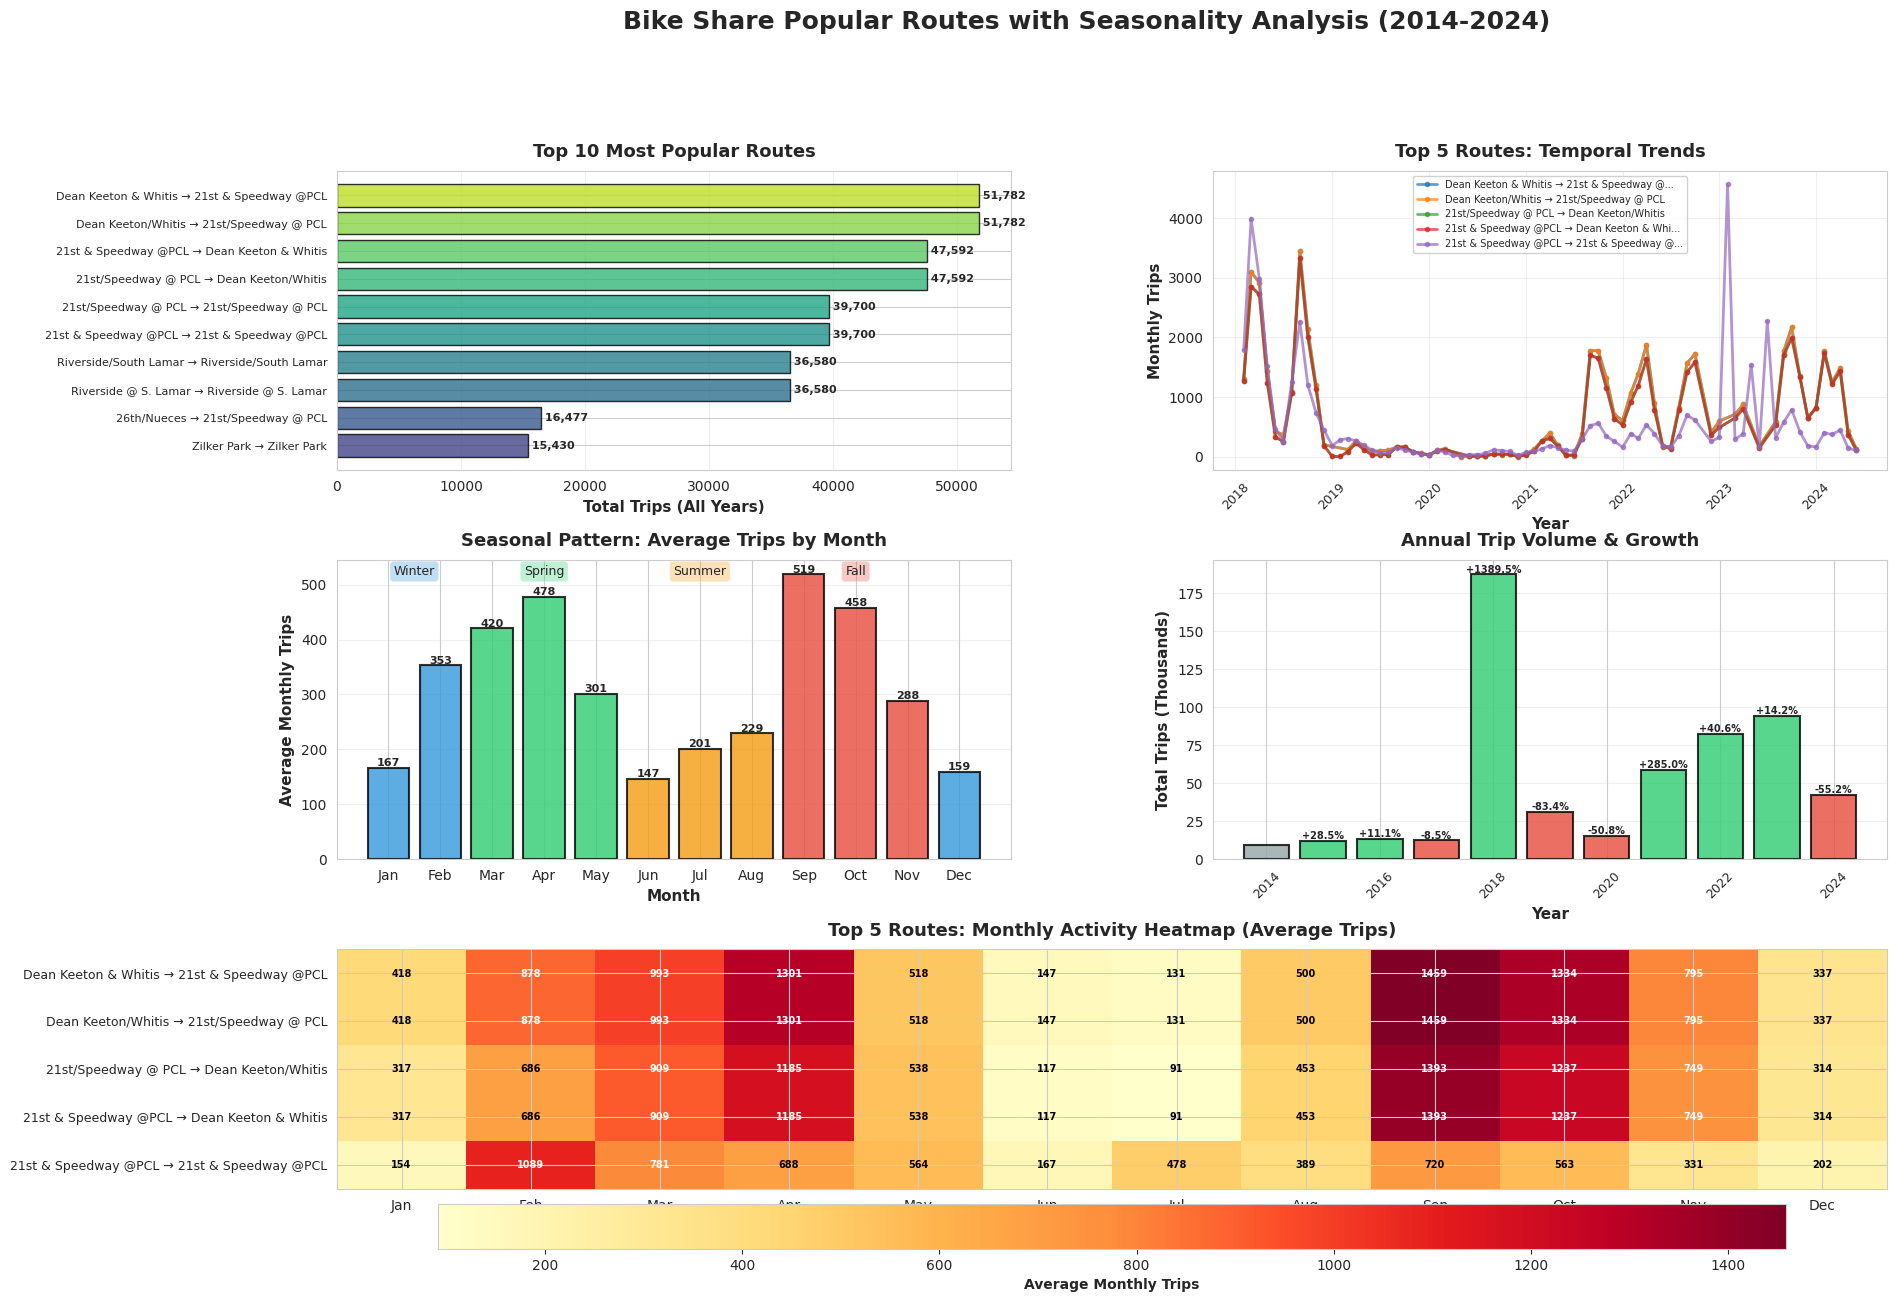


POPULAR ROUTES WITH SEASONALITY ANALYSIS
Total Unique Routes: 25
Total Trip Records: 1,792
Date Range: Feb 2014 to Jun 2024
Total Trips (All Routes, All Time): 560,507

TOP 15 MOST POPULAR ROUTES
--------------------------------------------------------------------------------------------------------------
Rank   Route                                                             Total Trips     Avg/Month   
--------------------------------------------------------------------------------------------------------------
#1     Dean Keeton & Whitis → 21st & Speedway @PCL                       51,782          740         
#2     Dean Keeton/Whitis → 21st/Speedway @ PCL                          51,782          740         
#3     21st/Speedway @ PCL → Dean Keeton/Whitis                          47,592          670         
#4     21st & Speedway @PCL → Dean Keeton & Whitis                       47,592          670         
#5     21st & Speedway @PCL → 21st & Speedway @PCL                     

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Read the CSV file
df = pd.read_csv('03_popular_routes_with_seasonality.csv')

# Convert month to datetime
df['date'] = pd.to_datetime(df['month'])
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')

# Create route identifier
df['route'] = df['start_station_name'] + ' → ' + df['end_station_name']

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

fig.suptitle('Bike Share Popular Routes with Seasonality Analysis (2014-2024)',
             fontsize=18, fontweight='bold', y=0.995)

# Get top routes
route_totals = df.groupby('route')['trips_in_month'].sum().sort_values(ascending=False)
top_10_routes = route_totals.head(10).index.tolist()

# Plot 1: Top 10 Routes by Total Trips
ax1 = fig.add_subplot(gs[0, 0])
top_route_data = route_totals.head(10).sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top_route_data)))
bars = ax1.barh(range(len(top_route_data)), top_route_data.values,
                color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_yticks(range(len(top_route_data)))
route_labels = [route[:50] + '...' if len(route) > 50 else route for route in top_route_data.index]
ax1.set_yticklabels(route_labels, fontsize=8)
ax1.set_xlabel('Total Trips (All Years)', fontsize=11, fontweight='bold')
ax1.set_title('Top 10 Most Popular Routes', fontsize=13, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, axis='x')

for i, (route, trips) in enumerate(zip(top_route_data.index, top_route_data.values)):
    ax1.text(trips, i, f' {trips:,.0f}', va='center', fontsize=8, fontweight='bold')

# Plot 2: Temporal Trend of Top Routes
ax2 = fig.add_subplot(gs[0, 1])
for i, route in enumerate(top_10_routes[:5]):
    route_data = df[df['route'] == route].sort_values('date')
    ax2.plot(route_data['date'], route_data['trips_in_month'],
             marker='o', markersize=3, linewidth=2, alpha=0.7,
             label=route[:40] + '...' if len(route) > 40 else route)

ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('Monthly Trips', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Routes: Temporal Trends', fontsize=13, fontweight='bold', pad=10)
ax2.legend(fontsize=7, loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45, labelsize=9)

# Plot 3: Seasonal Pattern (Monthly Average)
ax3 = fig.add_subplot(gs[1, 0])
monthly_avg = df.groupby('month_num')['trips_in_month'].mean().reset_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors_seasonal = ['#3498db' if m in [12, 1, 2] else '#2ecc71' if m in [3, 4, 5]
                   else '#f39c12' if m in [6, 7, 8] else '#e74c3c'
                   for m in monthly_avg['month_num']]

bars3 = ax3.bar(range(1, 13), monthly_avg['trips_in_month'],
                color=colors_seasonal, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(months, fontsize=10)
ax3.set_xlabel('Month', fontsize=11, fontweight='bold')
ax3.set_ylabel('Average Monthly Trips', fontsize=11, fontweight='bold')
ax3.set_title('Seasonal Pattern: Average Trips by Month', fontsize=13, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3, axis='y')

for i, (month, trips) in enumerate(zip(range(1, 13), monthly_avg['trips_in_month'])):
    ax3.text(month, trips, f'{trips:.0f}', ha='center', va='bottom',
             fontsize=8, fontweight='bold')

# Add season labels
ax3.text(1.5, ax3.get_ylim()[1] * 0.95, 'Winter', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#3498db', alpha=0.3))
ax3.text(4, ax3.get_ylim()[1] * 0.95, 'Spring', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#2ecc71', alpha=0.3))
ax3.text(7, ax3.get_ylim()[1] * 0.95, 'Summer', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f39c12', alpha=0.3))
ax3.text(10, ax3.get_ylim()[1] * 0.95, 'Fall', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#e74c3c', alpha=0.3))

# Plot 4: Year-over-Year Growth
ax4 = fig.add_subplot(gs[1, 1])
yearly_trips = df.groupby('year')['trips_in_month'].sum().reset_index()
yearly_trips['growth_pct'] = yearly_trips['trips_in_month'].pct_change() * 100

colors_growth = ['#2ecc71' if g > 0 else '#e74c3c' if g < 0 else '#95a5a6'
                 for g in yearly_trips['growth_pct'].fillna(0)]
bars4 = ax4.bar(yearly_trips['year'], yearly_trips['trips_in_month']/1000,
                color=colors_growth, alpha=0.8, edgecolor='black', linewidth=1.5)

ax4.set_xlabel('Year', fontsize=11, fontweight='bold')
ax4.set_ylabel('Total Trips (Thousands)', fontsize=11, fontweight='bold')
ax4.set_title('Annual Trip Volume & Growth', fontsize=13, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.tick_params(axis='x', rotation=45, labelsize=9)

for i, (year, trips, growth) in enumerate(zip(yearly_trips['year'],
                                               yearly_trips['trips_in_month']/1000,
                                               yearly_trips['growth_pct'].fillna(0))):
    if year != yearly_trips['year'].min():
        ax4.text(year, trips, f'+{growth:.1f}%' if growth > 0 else f'{growth:.1f}%',
                ha='center', va='bottom', fontsize=7, fontweight='bold')

# Plot 5: Heatmap - Top 5 Routes Monthly Pattern
ax5 = fig.add_subplot(gs[2, :])
top_5_routes = route_totals.head(5).index
heatmap_data = []
for route in top_5_routes:
    route_monthly = df[df['route'] == route].groupby('month_num')['trips_in_month'].mean()
    heatmap_data.append([route_monthly.get(i, 0) for i in range(1, 13)])

heatmap_array = np.array(heatmap_data)
im = ax5.imshow(heatmap_array, cmap='YlOrRd', aspect='auto', interpolation='nearest')

ax5.set_xticks(range(12))
ax5.set_xticklabels(months, fontsize=10)
ax5.set_yticks(range(5))
route_labels_heat = [route[:60] + '...' if len(route) > 60 else route for route in top_5_routes]
ax5.set_yticklabels(route_labels_heat, fontsize=9)
ax5.set_xlabel('Month', fontsize=11, fontweight='bold')
ax5.set_title('Top 5 Routes: Monthly Activity Heatmap (Average Trips)',
              fontsize=13, fontweight='bold', pad=10)

cbar = plt.colorbar(im, ax=ax5, orientation='horizontal', pad=0.05, aspect=30)
cbar.set_label('Average Monthly Trips', fontsize=10, fontweight='bold')

for i in range(5):
    for j in range(12):
        text = ax5.text(j, i, f'{heatmap_array[i, j]:.0f}',
                       ha='center', va='center', color='black' if heatmap_array[i, j] < heatmap_array.max()/2 else 'white',
                       fontsize=7, fontweight='bold')

plt.tight_layout()
plt.show()

# Print comprehensive statistics
print("\n" + "="*110)
print("POPULAR ROUTES WITH SEASONALITY ANALYSIS")
print("="*110)
print(f"Total Unique Routes: {df['route'].nunique():,}")
print(f"Total Trip Records: {len(df):,}")
print(f"Date Range: {df['date'].min().strftime('%b %Y')} to {df['date'].max().strftime('%b %Y')}")
print(f"Total Trips (All Routes, All Time): {df['trips_in_month'].sum():,}")

print(f"\n{'TOP 15 MOST POPULAR ROUTES'}")
print("-"*110)
print(f"{'Rank':<6} {'Route':<65} {'Total Trips':<15} {'Avg/Month':<12}")
print("-"*110)
for i, (route, trips) in enumerate(route_totals.head(15).items()):
    avg_monthly = df[df['route'] == route]['trips_in_month'].mean()
    route_display = route[:60] + '...' if len(route) > 60 else route
    print(f"#{i+1:<5} {route_display:<65} {trips:<15,.0f} {avg_monthly:<12,.0f}")

print(f"\n{'SEASONAL ANALYSIS'}")
print("-"*110)
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
              6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
              11: 'Fall', 12: 'Winter'}
df['season'] = df['month_num'].map(season_map)
seasonal_stats = df.groupby('season')['trips_in_month'].agg(['sum', 'mean', 'count']).reset_index()
seasonal_stats = seasonal_stats.sort_values('sum', ascending=False)

print(f"{'Season':<15} {'Total Trips':<20} {'Avg Trips/Month':<20} {'# Months':<12}")
print("-"*110)
for _, row in seasonal_stats.iterrows():
    print(f"{row['season']:<15} {row['sum']:<20,.0f} {row['mean']:<20,.1f} {int(row['count']):<12}")

print(f"\n{'YEAR-OVER-YEAR TRENDS'}")
print("-"*110)
yearly_stats = df.groupby('year').agg({
    'trips_in_month': ['sum', 'mean', 'count'],
    'route': 'nunique'
}).reset_index()
yearly_stats.columns = ['Year', 'Total Trips', 'Avg Monthly', 'Records', 'Unique Routes']
yearly_stats['YoY Growth %'] = yearly_stats['Total Trips'].pct_change() * 100

print(f"{'Year':<8} {'Total Trips':<18} {'Avg/Month':<15} {'Unique Routes':<15} {'YoY Growth':<12}")
print("-"*110)
for _, row in yearly_stats.iterrows():
    growth_str = f"+{row['YoY Growth %']:.1f}%" if row['YoY Growth %'] > 0 else f"{row['YoY Growth %']:.1f}%" if not pd.isna(row['YoY Growth %']) else 'N/A'
    print(f"{int(row['Year']):<8} {row['Total Trips']:<18,.0f} {row['Avg Monthly']:<15,.0f} {int(row['Unique Routes']):<15} {growth_str:<12}")

print(f"\n{'ROUND-TRIP VS ONE-WAY ANALYSIS'}")
print("-"*110)
df['is_round_trip'] = df['start_station_name'] == df['end_station_name']
round_trip_stats = df.groupby('is_round_trip')['trips_in_month'].agg(['sum', 'count', 'mean']).reset_index()
round_trip_stats['type'] = round_trip_stats['is_round_trip'].map({True: 'Round Trip', False: 'One-Way'})

for _, row in round_trip_stats.iterrows():
    pct = (row['sum'] / df['trips_in_month'].sum()) * 100
    print(f"{row['type']:<15} Total: {row['sum']:>12,.0f} trips ({pct:>5.1f}%) | Avg/Route: {row['mean']:>8,.1f}")

print(f"\n{'TOP 5 ROUND-TRIP ROUTES'}")
print("-"*110)
round_trips = df[df['is_round_trip']].groupby('route')['trips_in_month'].sum().sort_values(ascending=False).head(5)
for i, (route, trips) in enumerate(round_trips.items()):
    route_display = route[:80] + '...' if len(route) > 80 else route
    print(f"#{i+1}. {route_display}")
    print(f"    Total Trips: {trips:,}")

print(f"\n{'PEAK ACTIVITY MONTHS'}")
print("-"*110)
peak_month = df.groupby(['year', 'month_name'])['trips_in_month'].sum().reset_index()
peak_month = peak_month.sort_values('trips_in_month', ascending=False).head(10)
print(f"{'Rank':<6} {'Month-Year':<20} {'Total Trips':<15}")
print("-"*110)
for i, (_, row) in enumerate(peak_month.iterrows()):
    print(f"#{i+1:<5} {row['month_name']} {int(row['year']):<15} {row['trips_in_month']:<15,.0f}")

print("="*110)

**Daily Station Activity Anomaly Detection**

This visualization analyzes bike share station traffic anomalies over a 3-day period (June 28-30, 2024) by comparing actual daily trips against 28-day historical moving averages. The system identifies spikes (traffic exceeding 1.5x the historical average) and drops (traffic below 0.5x the average), helping operators detect unusual patterns.
Key features:

Anomaly classification categorizing each station-day as normal, spike, or drop
Severity ranking showing which stations experienced the most extreme deviations
Temporal tracking monitoring how individual stations perform against their historical baselines
Pattern identification revealing which stations are most volatile or consistently anomalous

This analysis is crucial for:

Detecting maintenance issues (sudden drops may indicate broken docks/bikes)
Identifying special events (spikes may correlate with concerts, games, festivals)
Resource allocation (understanding which stations need more attention)
Service quality monitoring (ensuring consistent availability across the network)

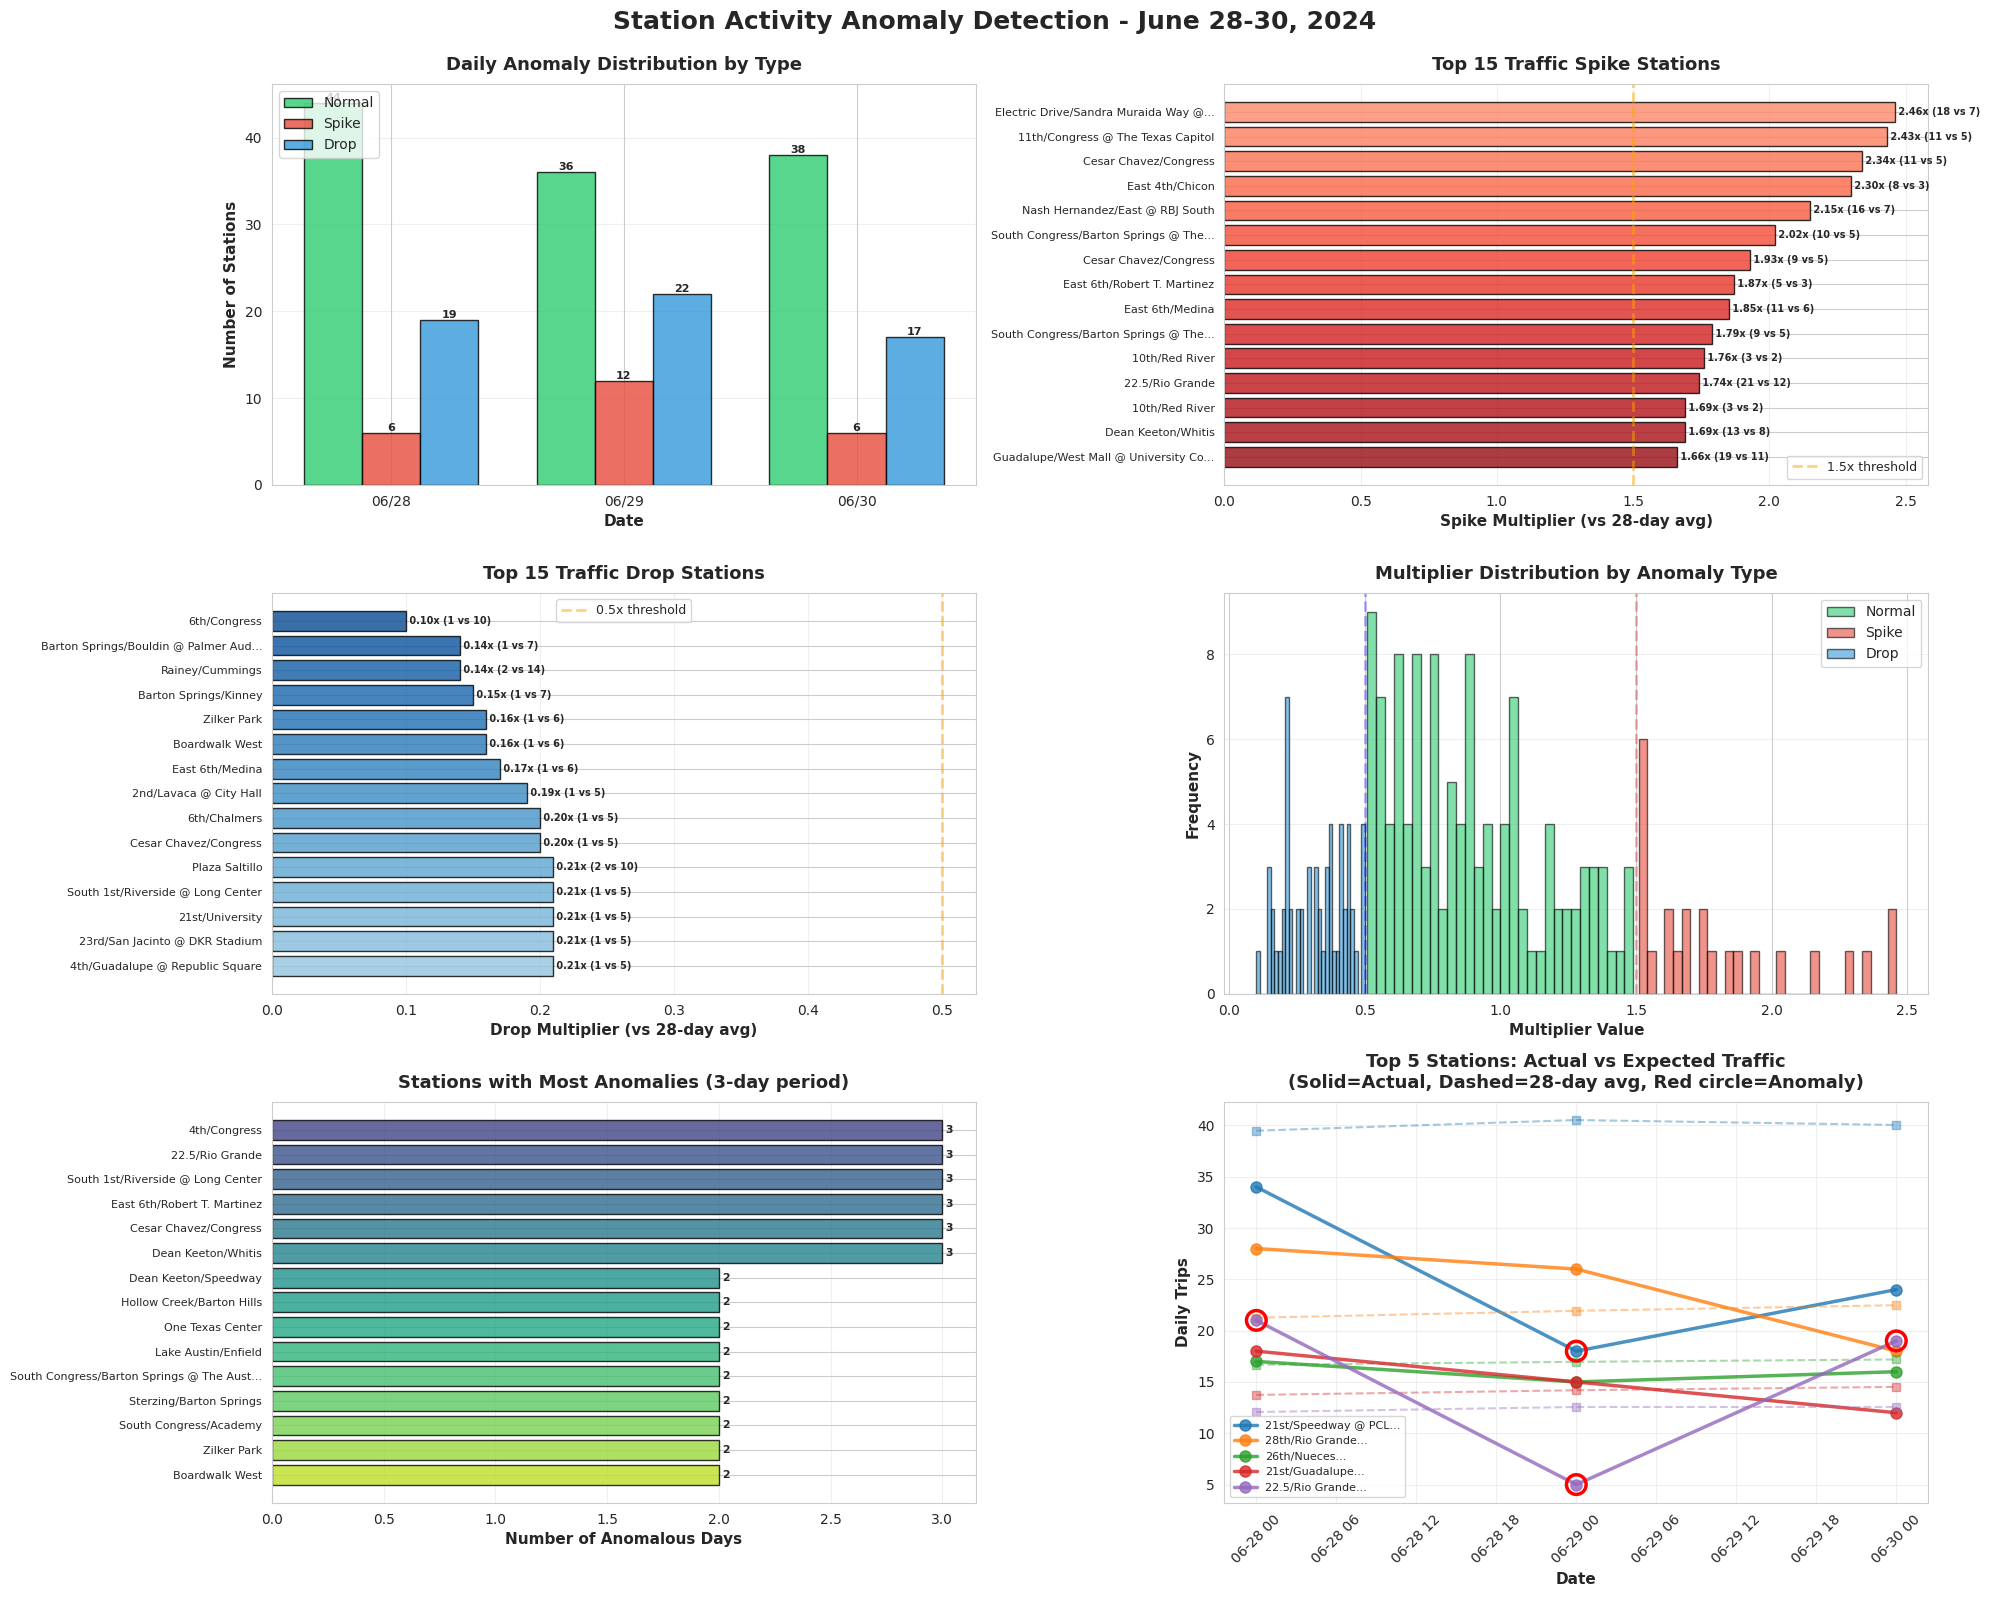


STATION ACTIVITY ANOMALY DETECTION ANALYSIS
Analysis Period: June 28, 2024 to June 30, 2024
Total Station-Days Analyzed: 200
Unique Stations Monitored: 77

ANOMALY SUMMARY
--------------------------------------------------------------------------------------------------------------
Normal             118 occurrences ( 59.0%)
Drop                58 occurrences ( 29.0%)
Spike               24 occurrences ( 12.0%)

DAILY BREAKDOWN
--------------------------------------------------------------------------------------------------------------
Date            Normal     Spikes     Drops      Total Anomalies    % Anomalous 
--------------------------------------------------------------------------------------------------------------
2024-06-28      44         6          19         25                 36.2        %
2024-06-29      36         12         22         34                 48.6        %
2024-06-30      38         6          17         23                 37.7        %

TOP 15 MOST SEVER

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('04_anomaly_detection.csv')

# Convert day to datetime
df['date'] = pd.to_datetime(df['day'])

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 16))
fig.suptitle('Station Activity Anomaly Detection - June 28-30, 2024',
             fontsize=18, fontweight='bold', y=0.995)

# Color mapping for anomalies
anomaly_colors = {
    'normal': '#2ecc71',
    'spike': '#e74c3c',
    'drop': '#3498db'
}

# Plot 1: Anomaly Distribution
ax1 = axes[0, 0]
anomaly_counts = df.groupby(['day', 'anomaly_flag']).size().unstack(fill_value=0)
x_pos = range(len(anomaly_counts))
width = 0.25

dates = [d.strftime('%m/%d') for d in pd.to_datetime(anomaly_counts.index)]

for i, (anomaly_type, color) in enumerate(anomaly_colors.items()):
    if anomaly_type in anomaly_counts.columns:
        ax1.bar([x + width*i for x in x_pos], anomaly_counts[anomaly_type],
                width, label=anomaly_type.capitalize(), color=color,
                alpha=0.8, edgecolor='black', linewidth=1)

ax1.set_xlabel('Date', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Stations', fontsize=11, fontweight='bold')
ax1.set_title('Daily Anomaly Distribution by Type', fontsize=13, fontweight='bold', pad=10)
ax1.set_xticks([x + width for x in x_pos])
ax1.set_xticklabels(dates)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (anomaly_type, color) in enumerate(anomaly_colors.items()):
    if anomaly_type in anomaly_counts.columns:
        for j, val in enumerate(anomaly_counts[anomaly_type]):
            if val > 0:
                ax1.text(j + width*i, val, str(int(val)),
                        ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 2: Top Spike Stations
ax2 = axes[0, 1]
spikes = df[df['anomaly_flag'] == 'spike'].copy()
top_spikes = spikes.nlargest(15, 'multiplier')
colors_spike = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_spikes)))

bars = ax2.barh(range(len(top_spikes)), top_spikes['multiplier'],
                color=colors_spike, alpha=0.8, edgecolor='black', linewidth=1)
ax2.set_yticks(range(len(top_spikes)))
station_labels = [f"{name[:35]}..." if len(name) > 35 else name
                  for name in top_spikes['start_station_name']]
ax2.set_yticklabels(station_labels, fontsize=8)
ax2.invert_yaxis()
ax2.set_xlabel('Spike Multiplier (vs 28-day avg)', fontsize=11, fontweight='bold')
ax2.set_title('Top 15 Traffic Spike Stations', fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(1.5, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='1.5x threshold')
ax2.legend(fontsize=9)

for i, (mult, trips, avg) in enumerate(zip(top_spikes['multiplier'],
                                             top_spikes['daily_trips'],
                                             top_spikes['moving_avg_28_before'])):
    ax2.text(mult, i, f' {mult:.2f}x ({int(trips)} vs {avg:.0f})',
             va='center', fontsize=7, fontweight='bold')

# Plot 3: Top Drop Stations
ax3 = axes[1, 0]
drops = df[df['anomaly_flag'] == 'drop'].copy()
top_drops = drops.nsmallest(15, 'multiplier')
colors_drop = plt.cm.Blues(np.linspace(0.9, 0.4, len(top_drops)))

bars = ax3.barh(range(len(top_drops)), top_drops['multiplier'],
                color=colors_drop, alpha=0.8, edgecolor='black', linewidth=1)
ax3.set_yticks(range(len(top_drops)))
station_labels = [f"{name[:35]}..." if len(name) > 35 else name
                  for name in top_drops['start_station_name']]
ax3.set_yticklabels(station_labels, fontsize=8)
ax3.invert_yaxis()
ax3.set_xlabel('Drop Multiplier (vs 28-day avg)', fontsize=11, fontweight='bold')
ax3.set_title('Top 15 Traffic Drop Stations', fontsize=13, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3, axis='x')
ax3.axvline(0.5, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='0.5x threshold')
ax3.legend(fontsize=9)

for i, (mult, trips, avg) in enumerate(zip(top_drops['multiplier'],
                                             top_drops['daily_trips'],
                                             top_drops['moving_avg_28_before'])):
    ax3.text(mult, i, f' {mult:.2f}x ({int(trips)} vs {avg:.0f})',
             va='center', fontsize=7, fontweight='bold')

# Plot 4: Multiplier Distribution by Anomaly Type
ax4 = axes[1, 1]
for anomaly_type, color in anomaly_colors.items():
    data = df[df['anomaly_flag'] == anomaly_type]['multiplier']
    if len(data) > 0:
        ax4.hist(data, bins=30, alpha=0.6, label=anomaly_type.capitalize(),
                color=color, edgecolor='black', linewidth=1)

ax4.set_xlabel('Multiplier Value', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Multiplier Distribution by Anomaly Type', fontsize=13, fontweight='bold', pad=10)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axvline(0.5, color='blue', linestyle='--', linewidth=2, alpha=0.3)
ax4.axvline(1.5, color='red', linestyle='--', linewidth=2, alpha=0.3)

# Plot 5: Stations with Most Anomalies
ax5 = axes[2, 0]
station_anomalies = df[df['anomaly_flag'] != 'normal'].groupby('start_station_name').size().sort_values(ascending=False).head(15)
colors_stations = plt.cm.viridis(np.linspace(0.2, 0.9, len(station_anomalies)))

bars = ax5.barh(range(len(station_anomalies)), station_anomalies.values,
                color=colors_stations, alpha=0.8, edgecolor='black', linewidth=1)
ax5.set_yticks(range(len(station_anomalies)))
station_labels = [f"{name[:40]}..." if len(name) > 40 else name
                  for name in station_anomalies.index]
ax5.set_yticklabels(station_labels, fontsize=8)
ax5.invert_yaxis()
ax5.set_xlabel('Number of Anomalous Days', fontsize=11, fontweight='bold')
ax5.set_title('Stations with Most Anomalies (3-day period)', fontsize=13, fontweight='bold', pad=10)
ax5.grid(True, alpha=0.3, axis='x')

for i, count in enumerate(station_anomalies.values):
    ax5.text(count, i, f' {int(count)}', va='center', fontsize=8, fontweight='bold')

# Plot 6: Daily Traffic vs Historical Average - Top Stations
ax6 = axes[2, 1]
# Get stations with highest total traffic
top_traffic_stations = df.groupby('start_station_name')['daily_trips'].sum().nlargest(10).index
station_colors = plt.cm.tab10(range(10))

for i, station in enumerate(top_traffic_stations[:5]):
    station_data = df[df['start_station_name'] == station].sort_values('date')
    dates = station_data['date']

    # Plot actual vs expected
    ax6.plot(dates, station_data['daily_trips'], marker='o', markersize=8,
             linewidth=2.5, label=f"{station[:25]}...", color=station_colors[i], alpha=0.8)
    ax6.plot(dates, station_data['moving_avg_28_before'], marker='s', markersize=6,
             linewidth=1.5, linestyle='--', color=station_colors[i], alpha=0.4)

    # Mark anomalies
    anomalies = station_data[station_data['anomaly_flag'] != 'normal']
    if len(anomalies) > 0:
        ax6.scatter(anomalies['date'], anomalies['daily_trips'],
                   s=200, facecolors='none', edgecolors='red', linewidths=2.5, zorder=5)

ax6.set_xlabel('Date', fontsize=11, fontweight='bold')
ax6.set_ylabel('Daily Trips', fontsize=11, fontweight='bold')
ax6.set_title('Top 5 Stations: Actual vs Expected Traffic\n(Solid=Actual, Dashed=28-day avg, Red circle=Anomaly)',
              fontsize=13, fontweight='bold', pad=10)
ax6.legend(fontsize=8, loc='best', ncol=1)
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print comprehensive statistics
print("\n" + "="*110)
print("STATION ACTIVITY ANOMALY DETECTION ANALYSIS")
print("="*110)
print(f"Analysis Period: {df['date'].min().strftime('%B %d, %Y')} to {df['date'].max().strftime('%B %d, %Y')}")
print(f"Total Station-Days Analyzed: {len(df):,}")
print(f"Unique Stations Monitored: {df['start_station_name'].nunique()}")

print(f"\n{'ANOMALY SUMMARY'}")
print("-"*110)
anomaly_summary = df['anomaly_flag'].value_counts()
for anomaly_type, count in anomaly_summary.items():
    pct = (count / len(df)) * 100
    print(f"{anomaly_type.capitalize():<15} {count:>6,} occurrences ({pct:>5.1f}%)")

print(f"\n{'DAILY BREAKDOWN'}")
print("-"*110)
print(f"{'Date':<15} {'Normal':<10} {'Spikes':<10} {'Drops':<10} {'Total Anomalies':<18} {'% Anomalous':<12}")
print("-"*110)
for date in sorted(df['date'].unique()):
    day_data = df[df['date'] == date]
    normal = len(day_data[day_data['anomaly_flag'] == 'normal'])
    spikes = len(day_data[day_data['anomaly_flag'] == 'spike'])
    drops = len(day_data[day_data['anomaly_flag'] == 'drop'])
    total_anom = spikes + drops
    pct_anom = (total_anom / len(day_data)) * 100
    print(f"{date.strftime('%Y-%m-%d'):<15} {normal:<10} {spikes:<10} {drops:<10} {total_anom:<18} {pct_anom:<12.1f}%")

print(f"\n{'TOP 15 MOST SEVERE SPIKES'}")
print("-"*110)
print(f"{'Rank':<6} {'Station':<45} {'Date':<12} {'Trips':<8} {'Avg':<8} {'Multiplier':<10}")
print("-"*110)
spikes_ranked = df[df['anomaly_flag'] == 'spike'].nlargest(15, 'multiplier')
for i, (_, row) in enumerate(spikes_ranked.iterrows()):
    station_display = row['start_station_name'][:42] + '...' if len(row['start_station_name']) > 42 else row['start_station_name']
    print(f"#{i+1:<5} {station_display:<45} {row['date'].strftime('%Y-%m-%d'):<12} "
          f"{int(row['daily_trips']):<8} {row['moving_avg_28_before']:<8.1f} {row['multiplier']:<10.2f}x")

print(f"\n{'TOP 15 MOST SEVERE DROPS'}")
print("-"*110)
print(f"{'Rank':<6} {'Station':<45} {'Date':<12} {'Trips':<8} {'Avg':<8} {'Multiplier':<10}")
print("-"*110)
drops_ranked = df[df['anomaly_flag'] == 'drop'].nsmallest(15, 'multiplier')
for i, (_, row) in enumerate(drops_ranked.iterrows()):
    station_display = row['start_station_name'][:42] + '...' if len(row['start_station_name']) > 42 else row['start_station_name']
    print(f"#{i+1:<5} {station_display:<45} {row['date'].strftime('%Y-%m-%d'):<12} "
          f"{int(row['daily_trips']):<8} {row['moving_avg_28_before']:<8.1f} {row['multiplier']:<10.2f}x")

print(f"\n{'STATIONS WITH MOST ANOMALIES (ACROSS 3 DAYS)'}")
print("-"*110)
anomaly_by_station = df[df['anomaly_flag'] != 'normal'].groupby('start_station_name').agg({
    'anomaly_flag': 'count',
    'daily_trips': 'sum',
    'moving_avg_28_before': 'mean'
}).rename(columns={'anomaly_flag': 'anomaly_count'}).sort_values('anomaly_count', ascending=False)

print(f"{'Station':<50} {'Anomalies':<12} {'Total Trips':<15} {'Avg Expected':<12}")
print("-"*110)
for station, row in anomaly_by_station.head(15).iterrows():
    station_display = station[:47] + '...' if len(station) > 47 else station
    print(f"{station_display:<50} {int(row['anomaly_count']):<12} {int(row['daily_trips']):<15} {row['moving_avg_28_before']:<12.1f}")

print(f"\n{'MULTIPLIER STATISTICS'}")
print("-"*110)
for anomaly_type in ['spike', 'drop', 'normal']:
    data = df[df['anomaly_flag'] == anomaly_type]['multiplier']
    if len(data) > 0:
        print(f"\n{anomaly_type.upper()}:")
        print(f"  Count: {len(data):,}")
        print(f"  Mean Multiplier: {data.mean():.2f}x")
        print(f"  Median Multiplier: {data.median():.2f}x")
        print(f"  Min Multiplier: {data.min():.2f}x")
        print(f"  Max Multiplier: {data.max():.2f}x")

print(f"\n{'TRAFFIC PATTERNS'}")
print("-"*110)
print(f"Average Daily Trips per Station: {df['daily_trips'].mean():.1f}")
print(f"Average 28-Day Moving Average: {df['moving_avg_28_before'].mean():.1f}")
print(f"Stations with Zero Trips: {len(df[df['daily_trips'] == 0])}")
print(f"Highest Single Day Traffic: {df['daily_trips'].max()} trips at {df.loc[df['daily_trips'].idxmax(), 'start_station_name']}")
print(f"Lowest Non-Zero Traffic: {df[df['daily_trips'] > 0]['daily_trips'].min()} trips")

print("="*110)